In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

In [18]:
path_img="90_0_0_20170111210753614.jpg.chip.jpg"

In [19]:
image_paths = glob.glob(path_img)
print(len(image_paths))

0


In [20]:
ages = []
genders = []
for file in image_paths:
    _,tail = os.path.split(file)
    split_var = tail.split('_')
    ages.append(split_var[0])


In [21]:
idx = 35
plt.imshow(cv2.cvtColor(cv2.imread(image_paths[idx]),cv2.COLOR_BGR2RGB))
plt.show()
print('AGE OF FACE: {}  '.format(ages[idx]))

IndexError: list index out of range

In [ ]:
print(len(ages), len(image_paths))

0 0


In [ ]:
def imageReader(path,ch = 3, resize=(256,256)):
	kp = tf.io.read_file(path)
	kp = tf.image.decode_jpeg(kp, channels=ch)
	kp = tf.image.convert_image_dtype(kp, dtype=tf.float32)
	kp = tf.image.resize(kp, resize)
	return kp

def load_data(image_path, label):
    image = imageReader(image_path, 3, (256,256))
    
    return (image, int(label))

In [ ]:
train_size = int(0.9*(len(image_paths)))
test_size = int(0.1*(len(image_paths)))

trainDS = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], ages[:train_size]))
testDS = tf.data.Dataset.from_tensor_slices((image_paths[train_size:], ages[train_size:]))


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
trainDS = (trainDS
    .map(load_data, num_parallel_calls=AUTOTUNE)
    .batch(2)
    .prefetch(AUTOTUNE)
)


NameError: name 'trainDS' is not defined

In [ ]:
testDS = (testDS
    .map(load_data, num_parallel_calls=AUTOTUNE)
    .batch(2)
    .prefetch(AUTOTUNE)
)


In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
model = tf.keras.applications.MobileNetV2(input_shape = (256,256,3,),include_top=False,weights='imagenet')
model.trainable = True
inputs = tf.keras.Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mae'])

In [ ]:
hist = model.fit(trainDS,epochs=10,validation_data=testDS)

Epoch 1/10
10669/10669 [==============================] - 412s 35ms/step - loss: 200.7985 - mae: 10.7338 - val_loss: 129.7410 - val_mae: 8.4060
Epoch 2/10
10669/10669 [==============================] - 382s 36ms/step - loss: 113.5050 - mae: 8.0048 - val_loss: 104.2477 - val_mae: 7.5018
Epoch 3/10
10669/10669 [==============================] - 360s 34ms/step - loss: 91.0014 - mae: 7.1182 - val_loss: 94.5571 - val_mae: 7.0731
Epoch 4/10
10669/10669 [==============================] - 363s 34ms/step - loss: 76.5792 - mae: 6.5213 - val_loss: 84.0854 - val_mae: 6.6788
Epoch 5/10
10669/10669 [==============================] - 365s 34ms/step - loss: 67.3841 - mae: 6.1192 - val_loss: 84.5994 - val_mae: 6.6524
Epoch 6/10
10669/10669 [==============================] - 370s 35ms/step - loss: 60.2658 - mae: 5.8027 - val_loss: 86.5085 - val_mae: 6.7508
Epoch 7/10
10669/10669 [==============================] - 374s 35ms/step - loss: 54.9194 - mae: 5.5522 - val_loss: 80.0176 - val_mae: 6.4014
Epoch 8/

In [ ]:
model.save('age_out.h5')

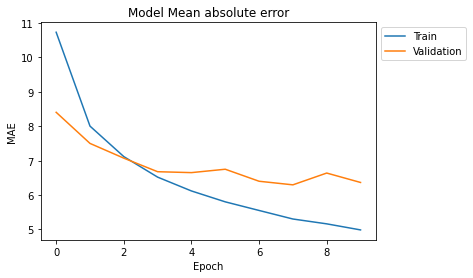

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model=load_model('age_out.h5')

def predict(img_pth):
  image = cv2.imread(img_pth)
  _,tail = os.path.split(img_pth)
  split_var = tail.split('_')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(256,256))
  print(image.shape)
  image = np.reshape(image,(1,256,256,3))

  out = model.predict(image)
  out = K.eval(out)
  plt.imshow(image[0])
  print('ACTUAL AGE  : '+split_var[0])
  print('PREDICTED AGE : '+str(out[0][0]-5)+" - "+str(out[0][0]+5))

ImportError: cannot import name 'load_model' from 'keras.utils' (C:\Users\logan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\__init__.py)

(256, 256, 3)
1/1 [==============================] - 1s 838ms/step
ACTUAL AGE  : 15
PREDICTED AGE : 9.073873519897461 - 19.07387351989746


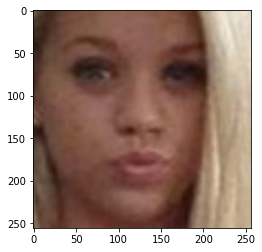

In [ ]:
predict("/content/UTKFace/15_1_0_20170109214412116.jpg.chip.jpg")